In [91]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, auc, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
import datetime
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [5]:
%load_ext tensorboard

In [7]:
# 데이터 로딩
raw_data = pd.read_csv("/Users/jk/git/Study/Data/kaggle_dataset/credit_fraud/creditcard.csv")

## 데이터 전처리 1 - 데이터 확인
### 컬럼의 데이터 갯수, 타입, 데이터 값의 범위, label, 불균형도 확인
### data.info(), data.head(), data.shape, data.라벨.value_counts()

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
raw_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

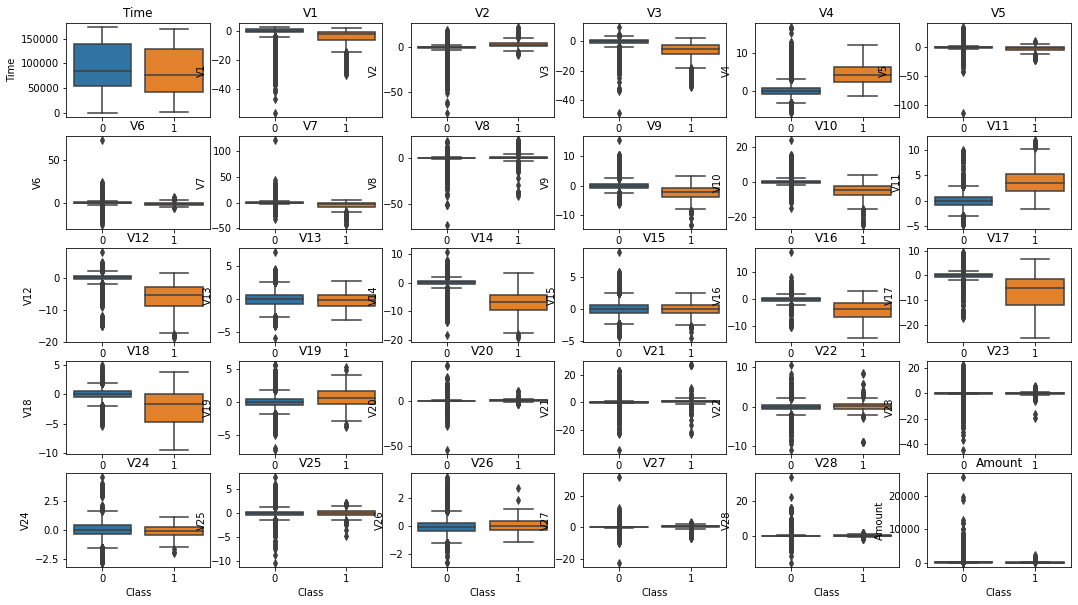

In [18]:
col = raw_data.columns
fig, ax = plt.subplots(5, 6, figsize=(18, 10))

for idx, name in enumerate(col):
    if idx == 30:
        continue
    i = idx // 6
    j = idx % 6
    sns.boxplot(x="Class", y=name, data=raw_data, ax=ax[i][j])
    ax[i][j].set_title(name)

In [19]:
raw_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [27]:
# 정규화 진행  - RubostScaler + MinMaxScaler
rs = RobustScaler()
mm = MinMaxScaler()
prep_data = raw_data.copy()

for idx, name in enumerate(raw_data.columns):
    if idx == 30:
        continue
    prep_data[name] = rs.fit_transform(raw_data[name].values.reshape(-1, 1))
    prep_data[name] = mm.fit_transform(prep_data[name].values.reshape(-1, 1))

prep_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


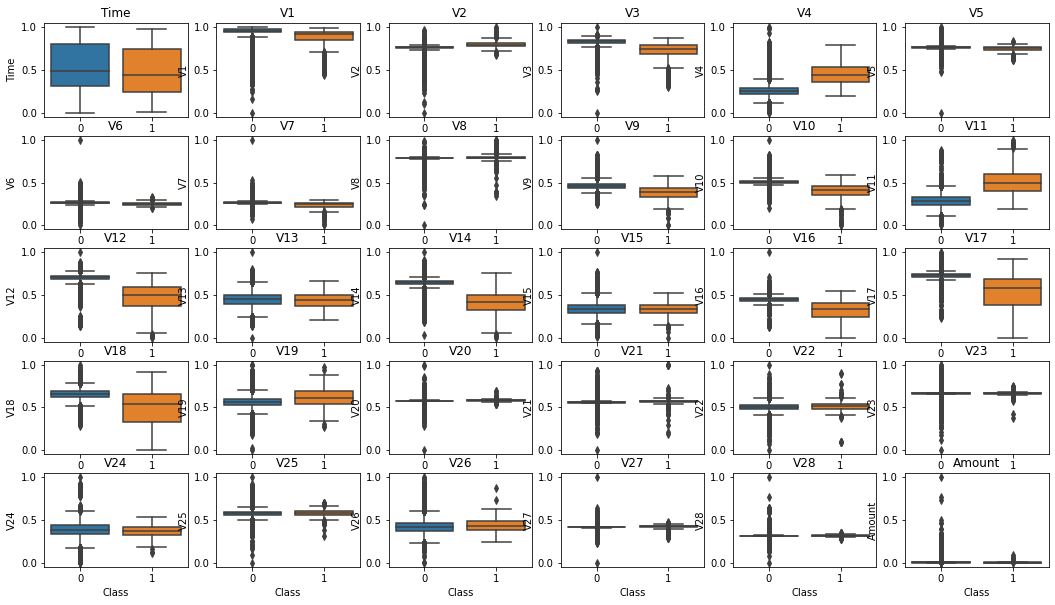

In [29]:
col = prep_data.columns
fig, ax = plt.subplots(5, 6, figsize=(18, 10))

for idx, name in enumerate(col):
    if idx == 30:
        continue
    i = idx // 6
    j = idx % 6
    sns.boxplot(x="Class", y=name, data=prep_data, ax=ax[i][j])
    ax[i][j].set_title(name)

In [65]:
# 데이터 셋 만들기
# train : val : test = 6: 2: 2

normal_data = prep_data[prep_data.Class == 0]
target_data = prep_data[prep_data.Class == 1]
train_nor_data, val_nor_data, test_nor_data = np.split(normal_data, [int(len(normal_data)*0.6), int(len(normal_data)*0.8)])

train_data = train_nor_data.sample(frac=1.0, random_state=101).reset_index(drop=True)
val_data = val_nor_data.sample(frac=1.0, random_state=101).reset_index(drop=True)
test_data = test_nor_data.append(target_data).sample(frac=1.0, random_state=101).reset_index(drop=True)

train_data = train_data.drop("Class", axis=1)
val_data = val_data.drop("Class", axis=1)
train_data.shape

(170589, 30)

In [66]:
# 모델 만들기
# 하이퍼 파라미터 정의하기.
input_dim = train_data.shape[1]
latent_dim = 4
learning_rate = 0.000001
batch_size = 64
nb_epoch = 50
inputs = tf.keras.layers.Input(shape=(input_dim, ))
latent_inputs = tf.keras.layers.Input(shape=(latent_dim, ))

In [67]:
def create_encoder(inputs):
    x = tf.keras.layers.Dense(14, activation="tanh", activity_regularizer=tf.keras.regularizers.l2(learning_rate))(inputs)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(7, activation="relu")(x)
    latent = tf.keras.layers.Dense(latent_dim, activation="relu")(x)
    return latent

def create_decoder(latent_vector):
    x = tf.keras.layers.Dense(7, activation="relu")(latent_vector)
    x = tf.keras.layers.Dense(14, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(input_dim, activation="tanh")(x)
    return outputs

encoder = tf.keras.models.Model(inputs=inputs, outputs=create_encoder(inputs), name="ae_encoder")
decoder = tf.keras.models.Model(inputs=latent_inputs, outputs=create_decoder(latent_inputs), name="ae_decoder")
autoencoder = tf.keras.models.Model(inputs=inputs, outputs=decoder(encoder(inputs)), name="autoencoder_basic")
autoencoder.summary()

Model: "autoencoder_basic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
ae_encoder (Functional)      (None, 4)                 571       
_________________________________________________________________
ae_decoder (Functional)      (None, 30)                597       
Total params: 1,168
Trainable params: 1,168
Non-trainable params: 0
_________________________________________________________________


In [68]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_basic", model="min", monitor="val_loss",
                                       verbose=2, save_best_onle=True)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="min",
    restore_best_weights=True
)

log_dir = "ae_basic_logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

autoencoder.compile(metrics=['acc'],
                   loss="mse",
                   optimizer="adam")

In [69]:
history = autoencoder.fit(train_data, train_data,
                         epochs=nb_epoch,
                         batch_size=batch_size,
                         shuffle=False,
                         validation_data=(val_data, val_data),
                         verbose=1,
                         callbacks=[cp, early_stop, tensorboard]).history

Epoch 1/50
2666/2666 [==============================] - 3s 1ms/step - loss: 0.0164 - acc: 0.7537 - val_loss: 0.0076 - val_acc: 0.9912

Epoch 00001: saving model to autoencoder_basic
INFO:tensorflow:Assets written to: autoencoder_basic/assets
Epoch 2/50
2666/2666 [==============================] - 3s 1ms/step - loss: 0.0030 - acc: 0.9902 - val_loss: 0.0035 - val_acc: 0.9912

Epoch 00002: saving model to autoencoder_basic
INFO:tensorflow:Assets written to: autoencoder_basic/assets
Epoch 3/50
2666/2666 [==============================] - 3s 1ms/step - loss: 0.0019 - acc: 0.9890 - val_loss: 0.0024 - val_acc: 0.9912

Epoch 00003: saving model to autoencoder_basic
INFO:tensorflow:Assets written to: autoencoder_basic/assets
Epoch 4/50
2666/2666 [==============================] - 3s 1ms/step - loss: 0.0016 - acc: 0.9914 - val_loss: 0.0021 - val_acc: 0.9912

Epoch 00004: saving model to autoencoder_basic
INFO:tensorflow:Assets written to: autoencoder_basic/assets
Epoch 5/50
2666/2666 [==========

In [70]:
%tensorboard --logdir ae_basic_logs/fit/20211021-131708

In [72]:
test_data_label = test_data["Class"]
test_dataset = test_data.drop("Class", axis=1)

pred = autoencoder.predict(test_dataset)
mse = np.mean(np.power(test_dataset - pred, 2), axis=1)
error_df = pd.DataFrame({"Reconstruction_error": mse,
                        "True_class": test_data_label})
error_df

,Reconstruction_error,True_class
0,0.004088,0
1,0.002659,0
2,0.001663,0
3,0.002272,0
4,0.002279,0
...,...,...
57350,0.001806,0
57351,0.002337,0
57352,0.003032,0
57353,0.002752,0


Text(0.5, 0, 'Data point index')

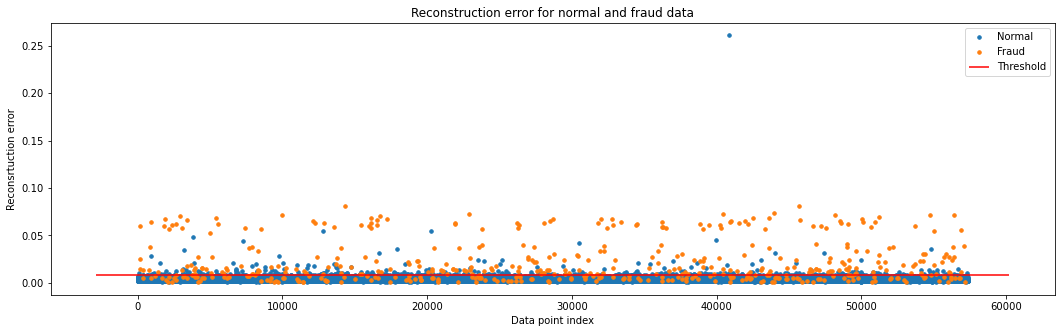

In [100]:
th = 0.008

true_group = error_df.groupby("True_class")
fig, ax = plt.subplots(figsize = (18, 5))

for name, group in true_group:
    ax.plot(group.index, group.Reconstruction_error, marker="o", ms=3.5, linestyle='',
           label="Fraud" if name == 1 else "Normal")
ax.hlines(th, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label="Threshold")
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconsrtuction error")
plt.xlabel("Data point index")

Text(15.0, 0.5, 'True class')

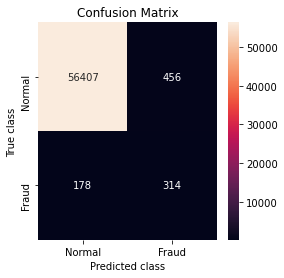

In [101]:
LABELS = ["Normal", "Fraud"]
pred_y = [1 if e > th else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] = pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)  # confusion_matrix는 그냥 갯수 세어주는 것. (True, pred)
fpr, tpr, th = roc_curve(error_df.True_class, error_df.Reconstruction_error)

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")